In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import numpy as np
import joblib
import h5py
import joblib
import math


plt.rcParams.update({'font.size': 22})

In [2]:

# load data
all_vals = pickle.load(open('StoryComparison_roi_vals_perms', 'rb'))

nperms = all_vals['PMC']['story_location'].shape[0]

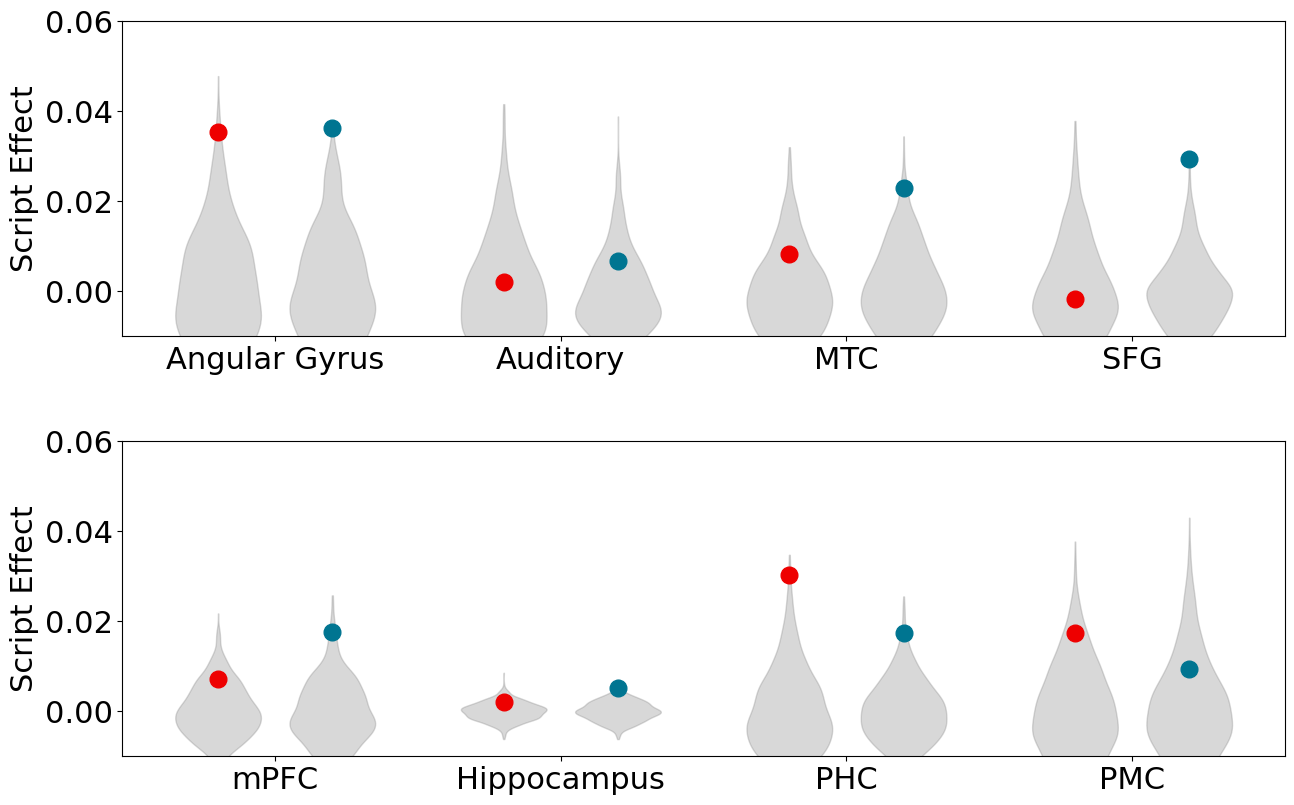

In [6]:
schema_vals = ['schema_location', 'schema_social']
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
pos = [.8,1.2,1.8,2.2,2.8,3.2,3.8,4.2]
loc_pos = [.8,1.8,2.8,3.8]
soc_pos = [1.2,2.2,3.2,4.2]

# lateral rois
lateral_rois = ['Ang', 'Aud', 'STS', 'SFG']
lateral_rois_labels = ['Angular Gyrus', 'Auditory', 'MTC','SFG']

lat_data = []
lat_y_loc = []
lat_y_soc = []

for roi in lateral_rois:
    for val in schema_vals:
        lat_data.append(all_vals[roi][val])
        if val == 'schema_location':
            lat_y_loc.append(all_vals[roi][val][0])
        else:
            lat_y_soc.append(all_vals[roi][val][0])


parts = axs[0].violinplot(lat_data, pos, widths=0.3,
                     showmeans=False, showextrema=False, showmedians=False)
axs[0].set_ylim(-.01, .06)
axs[0].set_xticks([1,2,3,4])
axs[0].set_xticklabels(lateral_rois_labels)
axs[0].set_ylabel('Script Effect')
axs[0].plot(loc_pos, lat_y_loc, 'o', color='#ee0000', markersize = '12', label = 'Location schema effect')
axs[0].plot(soc_pos, lat_y_soc, 'o', color='#007591', markersize = '12', label = 'Social schema effect')
for pc in parts['bodies']:
    pc.set_facecolor('#808080')
    pc.set_edgecolor('#808080')
    pc.set_alpha(.3)

box = axs[0].get_position()
axs[0].set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# medial rois
medial_rois = ['mPFC', 'Hipp', 'PHC', 'PMC']
medial_roi_labels = ['mPFC', 'Hippocampus', 'PHC', 'PMC']

med_data = []
med_y_loc = []
med_y_soc = []

for roi in medial_rois:
    for val in schema_vals:
        med_data.append(all_vals[roi][val])
        if val == 'schema_location':
            med_y_loc.append(all_vals[roi][val][0])
        else:
            med_y_soc.append(all_vals[roi][val][0])

parts = axs[1].violinplot(med_data, pos, widths=0.3,
                     showmeans=False, showextrema=False, showmedians=False)
axs[1].set_ylim(-.01, .06)
axs[1].set_xticks([1,2,3,4])
axs[1].set_xticklabels(medial_roi_labels)
axs[1].set_ylabel('Script Effect')
axs[1].plot(loc_pos, med_y_loc, 'o', color='#ee0000', markersize = '12', label = 'Location script effect')
axs[1].plot(soc_pos, med_y_soc, 'o', color='#007591', markersize = '12', label = 'Social script effect')
for pc in parts['bodies']:
    pc.set_facecolor('#808080')
    pc.set_edgecolor('#808080')
    pc.set_alpha(.3)

box = axs[1].get_position()
axs[1].set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

#fig.suptitle('Script Effects in ROIs')
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='sans-serif',
                                   weight='normal',
                                   style='normal', size=18)


legend = plt.legend(loc="upper right", edgecolor="black", prop=font,ncol=2)
legend.get_frame().set_alpha(None)
plt.show()


# printing all p values:

print('Lateral ROIs...')
for roi in lateral_rois:
    print(roi)
    for val in schema_vals:
        pval = ((all_vals[roi][val][0:nperms] >=all_vals[roi][val][0]).sum())/nperms
        print(val, ' pval: ', pval, end =" ")
        if pval <= .05:
            print('*')
        else:
            print('')
            
print('\nMedial ROIs...')
for roi in medial_rois:
    print(roi)
    for val in schema_vals:
        pval = ((all_vals[roi][val][0:nperms] >=all_vals[roi][val][0]).sum())/nperms
        print(val, ' pval: ', pval, end =" ")
        if pval <= .05:
            print('*')
        else:
            print('')

In [4]:
all_vals = pickle.load(open('StoryComparison_roi_vals_mismatch_perms', 'rb'))

print('Mismatch analysis')

for roi in ['Ang', 'Aud', 'STS', 'SFG', 'mPFC', 'Hipp', 'PHC', 'PMC']:
    print(roi)
    for val in schema_vals:
        pval = 2*((np.abs(all_vals[roi][val][0:nperms]) >=np.abs(all_vals[roi][val][0])).sum())/nperms
        print(val, 'real', all_vals[roi][val][0], 'null', np.mean(all_vals[roi][val][0:nperms]), ' pval: ', pval, end =" ")
        if pval <= .05:
            print('*')
        else:
            print('')

Mismatch analysis
Ang
schema_location real -0.01395895785047604 null 6.359578579966822e-05  pval:  0.01998001998001998 *
schema_social real -0.014034278634933568 null 2.406514588352875e-05  pval:  0.003996003996003996 *
Aud
schema_location real -0.0009959292036128137 null -0.00015637484401889774  pval:  1.6703296703296704 
schema_social real -0.0029507277106894537 null 0.00013280157455711913  pval:  0.7552447552447552 
STS
schema_location real -0.0036702180656679128 null 0.00017763128988357183  pval:  0.6753246753246753 
schema_social real -0.008674301361531064 null -3.74052088685183e-05  pval:  0.04995004995004995 *
SFG
schema_location real 0.0006477413908026952 null -8.633505972176185e-06  pval:  1.7522477522477522 
schema_social real -0.011287380949532657 null 7.72769080953025e-05  pval:  0.005994005994005994 *
mPFC
schema_location real -0.002734896839647085 null 3.2396383379708526e-05  pval:  0.5594405594405595 
schema_social real -0.006909576112593434 null 6.891927301966426e-05  p